**Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd #untuk memproses data, manipulasi data, dan analisis data
import numpy as np #fungsi untuk aljabar linier dan pembuatan bilangan acak
import matplotlib.pyplot as plt #untuk visualisasi data seperti plot, histogram, bar chart, dll
%matplotlib inline
import seaborn as sns #untuk menampilkan visualisasi data lebih menarik
import warnings
import random

#--Sklearn library-- membantu melakukan processing data ataupun melakukan training data
from sklearn.model_selection import train_test_split #membagi data secara acak
from sklearn.metrics import confusion_matrix, classification_report #untuk memplot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #untuk memplot confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #model performance
from sklearn import metrics

#Membangun model SVM
from yellowbrick.target import ClassBalance
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

**Data Understanding**

In [3]:
# Importing data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/df_EDA.csv")

In [4]:
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

495467 rows and 14 columns


In [5]:
df.head()

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0


In [6]:
df.tail()

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0
495466,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Idaho Falls, ID",-2,75,458,Feb,Mon,0


In [7]:
print ("Features : \n\n", df.columns.tolist()) #mengetahui nama kolom/fitur

Features : 

 ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status']


In [8]:
print ("Missing values :\n\n", df.isnull().sum().sort_values(ascending=False)) #menghitung nilai null

Missing values :

 Quarter           0
Month             0
DayofMonth        0
DayOfWeek         0
FlightDate        0
Airlines          0
OriginCityName    0
DestCityName      0
DepDelay          0
AirTime           0
Distance          0
Month_Str         0
DayOfWeek_Str     0
Flight_Status     0
dtype: int64


In [9]:
print ("Unique values :  \n\n", df.nunique())  #menghitung unique values

Unique values :  

 Quarter              1
Month                1
DayofMonth          28
DayOfWeek            7
FlightDate          28
Airlines            10
OriginCityName     361
DestCityName       361
DepDelay          1032
AirTime            614
Distance          1473
Month_Str            1
DayOfWeek_Str        7
Flight_Status        2
dtype: int64


In [10]:
num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  3674


In [11]:
df.drop_duplicates(inplace=True)
df

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0


In [12]:
num_duplicate_rows = df.duplicated().sum() #menghitung data yang duplikat
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491793 entries, 0 to 495466
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Quarter         491793 non-null  int64 
 1   Month           491793 non-null  int64 
 2   DayofMonth      491793 non-null  int64 
 3   DayOfWeek       491793 non-null  int64 
 4   FlightDate      491793 non-null  object
 5   Airlines        491793 non-null  object
 6   OriginCityName  491793 non-null  object
 7   DestCityName    491793 non-null  object
 8   DepDelay        491793 non-null  int64 
 9   AirTime         491793 non-null  int64 
 10  Distance        491793 non-null  int64 
 11  Month_Str       491793 non-null  object
 12  DayOfWeek_Str   491793 non-null  object
 13  Flight_Status   491793 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 56.3+ MB


In [14]:
target='Flight_Status'
numfeat, catfeat = list(df.select_dtypes(include=np.number)), list(df.select_dtypes(exclude=np.number)); numfeat.remove(target)
df

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0


In [15]:
numfeat

['Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepDelay',
 'AirTime',
 'Distance']

In [16]:
catfeat

['FlightDate',
 'Airlines',
 'OriginCityName',
 'DestCityName',
 'Month_Str',
 'DayOfWeek_Str']

**Data Analysis**

In [17]:
df.describe()

,Quarter,Month,DayofMonth,DayOfWeek,DepDelay,AirTime,Distance,Flight_Status
count,491793.0,491793.0,491793.000000,491793.000000,491793.000000,491793.000000,491793.000000,491793.000000
mean,1.0,2.0,14.858906,3.965768,11.360619,112.215971,803.287298,0.190958
std,0.0,0.0,7.979054,2.026665,51.727175,70.285127,591.022406,0.393057
min,1.0,2.0,1.000000,1.000000,-78.000000,8.000000,31.000000,0.000000
25%,1.0,2.0,8.000000,2.000000,-5.000000,60.000000,369.000000,0.000000
50%,1.0,2.0,15.000000,4.000000,-2.000000,95.000000,651.000000,0.000000
75%,1.0,2.0,22.000000,6.000000,8.000000,142.000000,1046.000000,0.000000
max,1.0,2.0,28.000000,7.000000,2545.000000,668.000000,5095.000000,1.000000


In [18]:
#korelasi dengan Flight_Status
corr=df.corr()
corr.sort_values(by=["Flight_Status"],ascending=False).iloc[0].sort_values(ascending=False)

Flight_Status    1.000000
DepDelay         0.505847
DayofMonth       0.070686
DayOfWeek        0.052910
AirTime          0.033003
Distance         0.016588
Quarter               NaN
Month                 NaN
Name: Flight_Status, dtype: float64

**Data Preparation**

In [19]:
dfmodel = df.sample(frac=0.01)

In [20]:
print ("Unique values top_cities :  \n\n", dfmodel.nunique())  #menghitung unique values

Unique values top_cities :  

 Quarter              1
Month                1
DayofMonth          28
DayOfWeek            7
FlightDate          28
Airlines            10
OriginCityName     265
DestCityName       267
DepDelay           235
AirTime            339
Distance          1093
Month_Str            1
DayOfWeek_Str        7
Flight_Status        2
dtype: int64


In [21]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 81061 to 146958
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Quarter         4918 non-null   int64 
 1   Month           4918 non-null   int64 
 2   DayofMonth      4918 non-null   int64 
 3   DayOfWeek       4918 non-null   int64 
 4   FlightDate      4918 non-null   object
 5   Airlines        4918 non-null   object
 6   OriginCityName  4918 non-null   object
 7   DestCityName    4918 non-null   object
 8   DepDelay        4918 non-null   int64 
 9   AirTime         4918 non-null   int64 
 10  Distance        4918 non-null   int64 
 11  Month_Str       4918 non-null   object
 12  DayOfWeek_Str   4918 non-null   object
 13  Flight_Status   4918 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 576.3+ KB


In [22]:
print(f'{dfmodel.shape[0]} rows and {dfmodel.shape[1]} columns')

4918 rows and 14 columns


In [23]:
print ("Features : \n\n", df.columns.tolist()) #mengetahui nama kolom/fitur

Features : 

 ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status']


In [24]:
dfmodel = dfmodel.drop(['Quarter', 'Month', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'Month_Str', 'DayOfWeek_Str'], axis=1)
dfmodel

,DayofMonth,DayOfWeek,DepDelay,AirTime,Distance,Flight_Status
81061,6,7,7,115,834,0
486133,28,1,139,164,1299,1
402595,23,3,16,149,1034,0
320078,19,6,-2,78,534,0
17284,2,3,-8,95,599,0
...,...,...,...,...,...,...
174897,11,5,-3,88,641,0
407152,24,4,53,49,332,1
180630,11,5,-14,104,763,0
253598,15,2,-12,60,351,0


In [25]:
# Make scaling data method
def scaling_check(data):

    case_count = dfmodel['Flight_Status'].value_counts()
    print('Legend:')
    print(case_count)

    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['On Time (0)', 'Delayed (1)'])
    plt.show()

Legend:
0    3948
1     970
Name: Flight_Status, dtype: int64


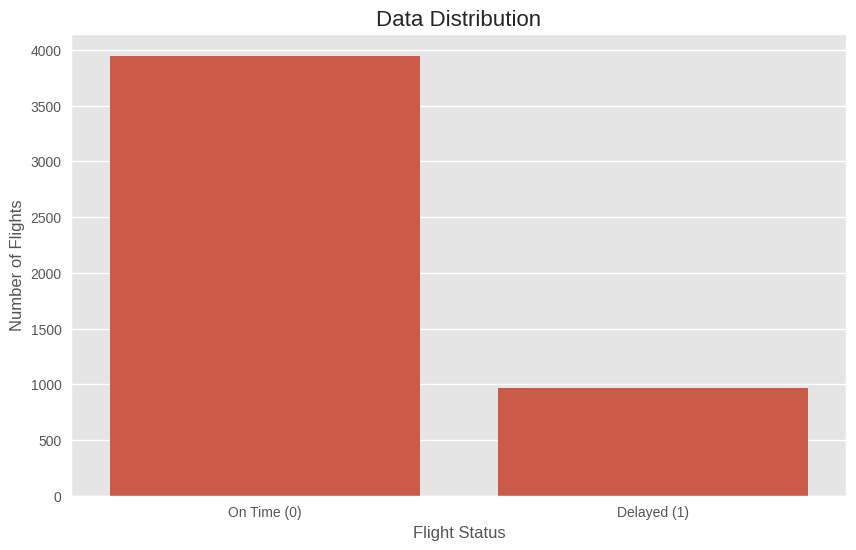

In [26]:
# Checking scaling data from Dataframe "dfmodel"
scaling_check(dfmodel)

In [27]:
dfmodel.columns

Index(['DayofMonth', 'DayOfWeek', 'DepDelay', 'AirTime', 'Distance',
       'Flight_Status'],
      dtype='object')

In [28]:
print(f'{dfmodel.shape[0]} rows and {dfmodel.shape[1]} columns')

4918 rows and 6 columns


**Building SVM Model**

In [29]:
#menentukan variabel
X = dfmodel.drop(['Flight_Status'], axis=1).copy()
y = dfmodel['Flight_Status'].copy()


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random.randint(1, 1000))

In [30]:
X_train.shape

(3442, 5)

In [31]:
X_test.shape

(1476, 5)

**Make Function**

In [32]:
#function untuk visualisasi confusion matrix
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)

    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["On Time","Delayed"])
    disp.plot(cmap='Blues',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    # plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

#function untuk menghitung recall dan accuracy
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train)
    ytest_predict = model.predict(X_test)
    # accuracy
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m",
          model.score(X_train,y_train),
          "\x1b[0;30;47m \033[1mTest:\033[0m",
          model.score(X_test,y_test))
    # recall
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m",
          metrics.recall_score(y_train,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m",
          metrics.recall_score(y_test,ytest_predict))

    clr_train = classification_report(y_train, ytrain_predict, target_names=["ON TIME", "DELAYED"])
    clr_test = classification_report(y_test, ytest_predict, target_names=["ON TIME", "DELAYED"])\

    make_confusion_matrix(y_train,ytrain_predict,"Confusion Matric on Train Data")
    print(clr_train)
    make_confusion_matrix(y_test,ytest_predict,"Confusion Matric on Test Data")
    print(clr_test)

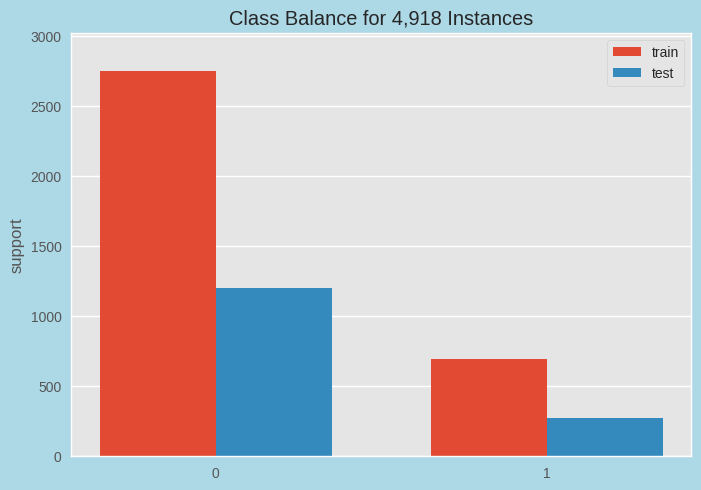

<Axes: title={'center': 'Class Balance for 4,918 Instances'}, ylabel='support'>

In [33]:
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y_train, y_test)
visualizer.poof()

**RBF Model**

 Accuracy : Train : 0.9055781522370715  Test: 0.9193766937669376
 Recall   : Train : 0.5488505747126436  Test: 0.5802919708029197


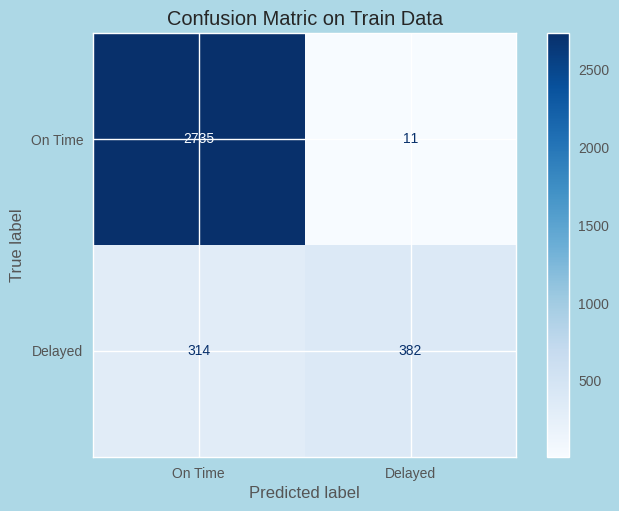

              precision    recall  f1-score   support

     ON TIME       0.90      1.00      0.94      2746
     DELAYED       0.97      0.55      0.70       696

    accuracy                           0.91      3442
   macro avg       0.93      0.77      0.82      3442
weighted avg       0.91      0.91      0.89      3442



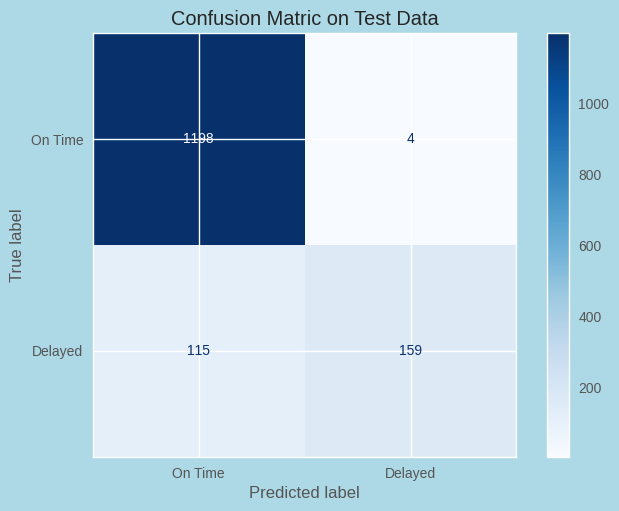

              precision    recall  f1-score   support

     ON TIME       0.91      1.00      0.95      1202
     DELAYED       0.98      0.58      0.73       274

    accuracy                           0.92      1476
   macro avg       0.94      0.79      0.84      1476
weighted avg       0.92      0.92      0.91      1476



In [34]:
#karena data tidak seimbang, maka diberikan weight pada tiap class

rbf_model=SVC(kernel="rbf",class_weight={0:0.2,1:0.8},random_state=random.randint(1, 1000))
rbf_model.fit(X_train, y_train)
get_recall_score(rbf_model)

**Linear Model**

 Accuracy : Train : 0.9087739686228936  Test: 0.9051490514905149
 Recall   : Train : 0.8146551724137931  Test: 0.8357664233576643


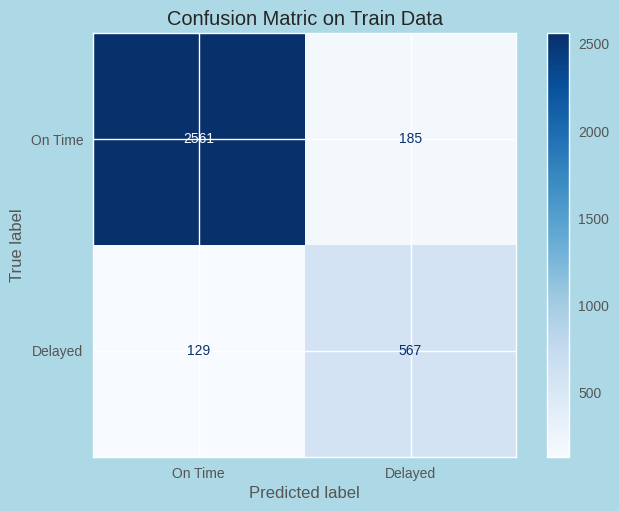

              precision    recall  f1-score   support

     ON TIME       0.95      0.93      0.94      2746
     DELAYED       0.75      0.81      0.78       696

    accuracy                           0.91      3442
   macro avg       0.85      0.87      0.86      3442
weighted avg       0.91      0.91      0.91      3442



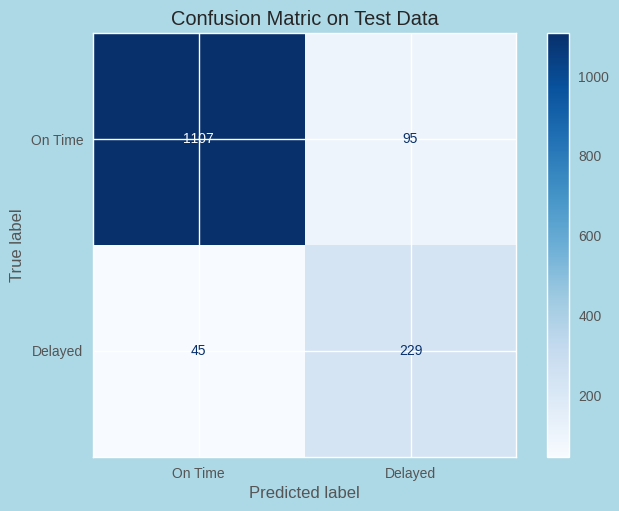

              precision    recall  f1-score   support

     ON TIME       0.96      0.92      0.94      1202
     DELAYED       0.71      0.84      0.77       274

    accuracy                           0.91      1476
   macro avg       0.83      0.88      0.85      1476
weighted avg       0.91      0.91      0.91      1476



In [35]:
#karena data tidak seimbang, maka diberikan weight pada tiap class

linear_model=SVC(kernel="linear",class_weight={0:0.2,1:0.8},random_state=random.randint(1, 1000))
linear_model.fit(X_train, y_train)
get_recall_score(linear_model)

**Polynomial Model**

 Accuracy : Train : 0.3451481696687972  Test: 0.31775067750677505
 Recall   : Train : 0.9798850574712644  Test: 0.9817518248175182


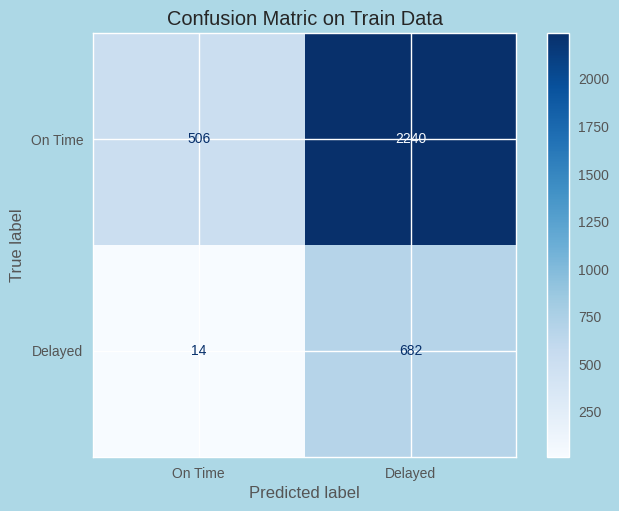

              precision    recall  f1-score   support

     ON TIME       0.97      0.18      0.31      2746
     DELAYED       0.23      0.98      0.38       696

    accuracy                           0.35      3442
   macro avg       0.60      0.58      0.34      3442
weighted avg       0.82      0.35      0.32      3442



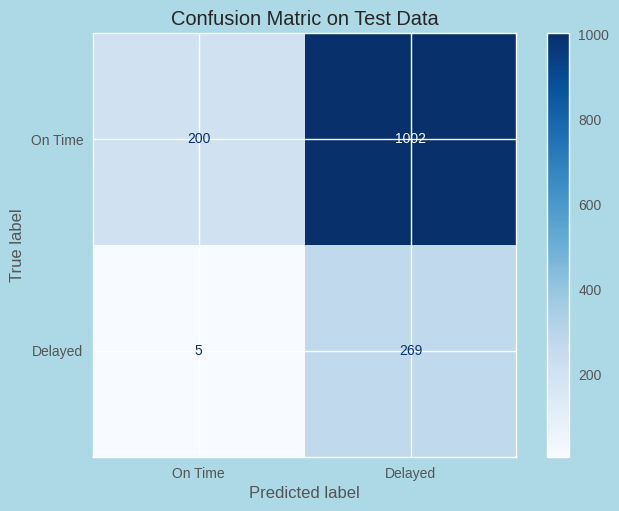

              precision    recall  f1-score   support

     ON TIME       0.98      0.17      0.28      1202
     DELAYED       0.21      0.98      0.35       274

    accuracy                           0.32      1476
   macro avg       0.59      0.57      0.32      1476
weighted avg       0.83      0.32      0.30      1476



In [36]:
#karena data tidak seimbang, maka diberikan weight pada tiap class

linear_model=SVC(kernel="poly",class_weight={0:0.15,1:0.85},random_state=random.randint(1, 1000))
linear_model.fit(X_train, y_train)
get_recall_score(linear_model)